In [74]:
import numpy as np
import pandas as pd

In [75]:
print("new sklearn version++++",sklearn.__version__)

new sklearn version++++ 0.24.2


In [76]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [77]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [78]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5565,ham,Huh y lei...,NaN,NaN,NaN
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...,NaN,NaN,NaN
3043,ham,Let me know how it changes in the next 6hrs. I...,NaN,NaN,NaN
1025,ham,I have a sore throat. It's scratches when I talk,NaN,NaN,NaN
1586,ham,There are no other charges after transfer char...,NaN,NaN,NaN


In [79]:
df.shape

(5572, 5)

In [80]:
# data cleaning
# Eda
# text preprocessing
# model building
# evaluation
# improvement 
# Website

## 1. Data Cleaning

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [82]:
# cdrop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [83]:
df.sample(5)

,v1,v2
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
2606,ham,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
4530,ham,I wish things were different. I wonder when i ...
2230,ham,Hey... Thk we juz go accordin to wat we discus...
5381,spam,You have 1 new message. Call 0207-083-6089


In [84]:
#renaming the column name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [85]:
df.sample(5)

,target,text
2649,ham,You might want to pull out more just in case a...
5563,ham,Ard 6 like dat lor.
3788,ham,Are you sure you don't mean \get here
2117,ham,Wish u many many returns of the day.. Happy bi...
465,ham,great princess! I love giving and receiving or...


In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [87]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
df['target'] = encoder.fit_transform(df['target'])

In [89]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
## missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [91]:
# check for duplicated value
df.duplicated().sum()

403

In [92]:
#remove duplicated values
df = df.drop_duplicates(keep='first')

In [93]:
#check again any duplicated value are showing or not
df.duplicated().sum()

0

In [94]:
df.shape

(5169, 2)

## 2. EDA (Explatory Data Analysis)

In [95]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

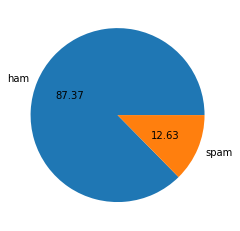

In [97]:
# chart showing
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [98]:
# data is imbalanced


In [99]:
import nltk

In [100]:
!pip install nltk

In [51]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
from nltk.corpus import stopwords

In [102]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [103]:
df['num_characters'] = df['text'].apply(len)

In [104]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [105]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [106]:
df.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [107]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [108]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [109]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
# ham 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
# spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [112]:
## plot histogram
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

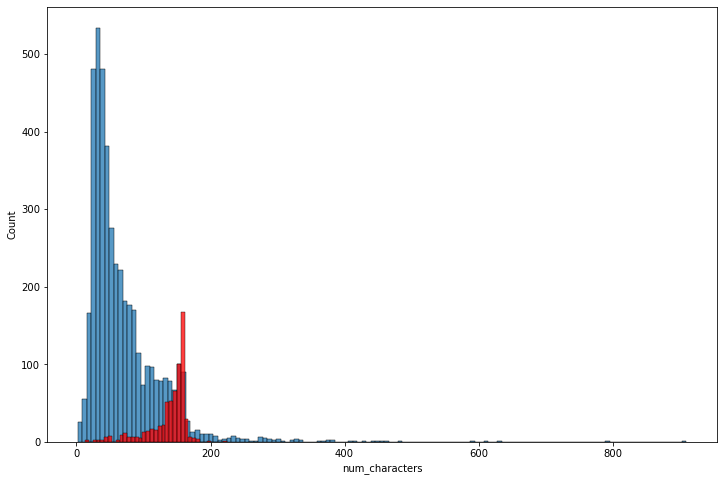

In [113]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]["num_characters"])
sns.histplot(df[df['target'] == 1]["num_characters"],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

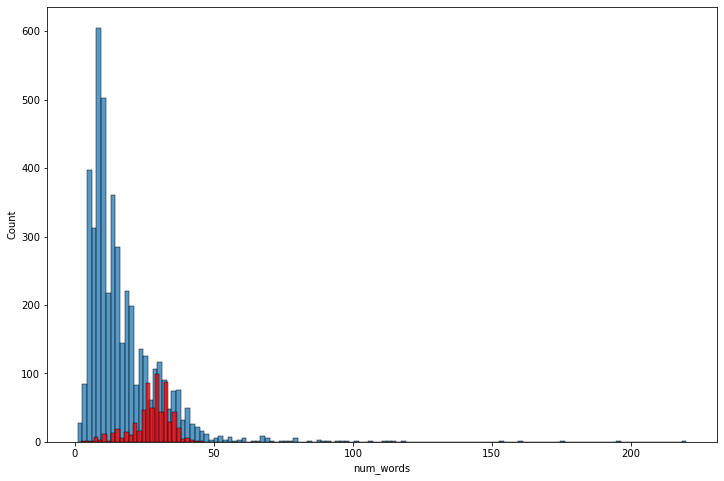

In [114]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]["num_words"])
sns.histplot(df[df['target'] == 1]["num_words"],color='red')

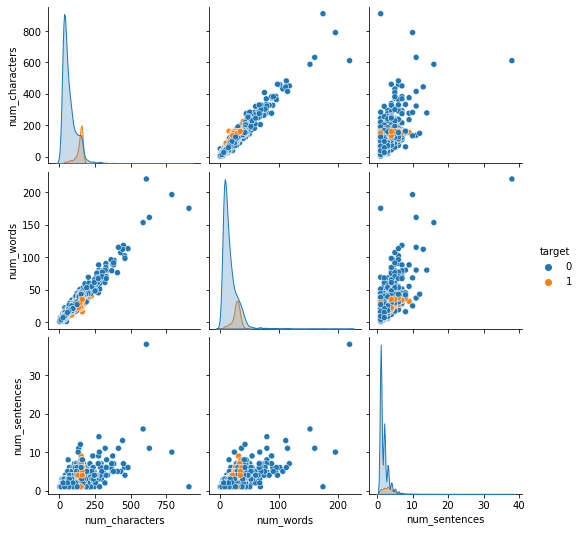

In [115]:
sns.pairplot(df,hue='target')

In [116]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

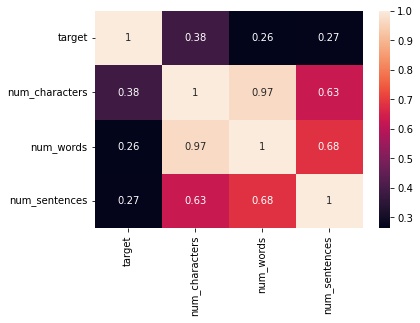

In [117]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
. Lower Case
. Tokenization
. Removing Special Charecter
. Removing stop words and punctuation
. Stemming // Lamitization ["dancing","danced","dance"]

In [122]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    #removing special charecters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #removing stopwords & punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
               y.append(i)
    #steaming
    text = y[:]
    y.clear()
    
    for i in text:
            y.append(ps.stem(i))
            
    return " ".join(y)

In [127]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [128]:
transform_text("Hi How Are %% You ?")

'hi'

In [129]:
transform_text("Did you like my presentation on ML?")

'like present ml'

In [130]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [132]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [258]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
from nltk.corpus import stopwords

In [134]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [135]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [136]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#like love loving && loved
ps.stem('loving')

'love'

In [137]:
#creating word cloud
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [139]:
df["transformed_text"] = df["text"].apply(transform_text)

In [140]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
#word cloud
import sys
print(sys.executable)

C:\Users\USER\anaconda3\python.exe


In [142]:
!pip3 install wordcloud

In [143]:
from wordcloud import WordCloud

In [144]:
##generate word cloud text
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")
##spam word cloud
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=""))

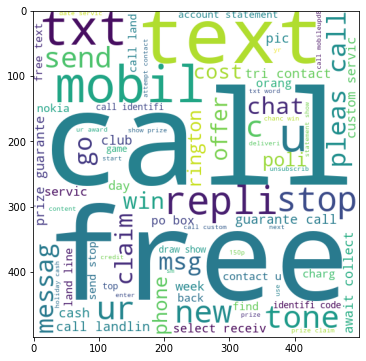

In [145]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [146]:
#creating ham word cloud
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=""))

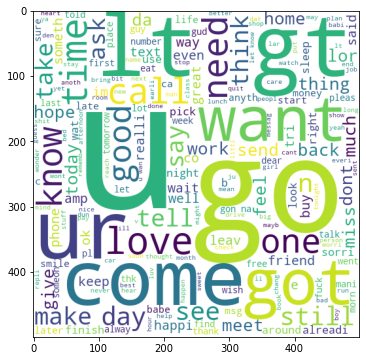

In [147]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [148]:
#top 30 words in ham messages
df[df['target'] == 1]["transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [149]:
#top 30 words
spam_corpus=[]
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [150]:
len(spam_corpus)

9939

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


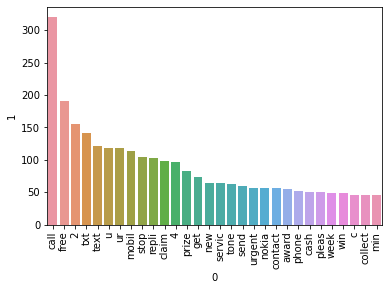

In [151]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
#top 30 words
ham_corpus=[]
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [153]:
len(ham_corpus)

35402

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


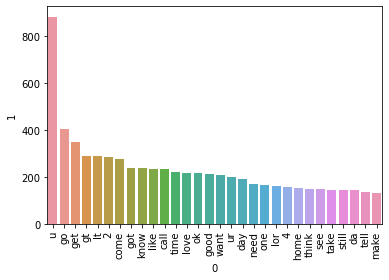

In [154]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building with naive base (textual data model building with navie base provides best result)


In [155]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [156]:
X= cv.fit_transform(df["transformed_text"]).toarray()

In [157]:
X.shape

(5169, 6708)

In [158]:
Y = df["target"].values

In [159]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
#split your model into train & test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [164]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [165]:
#Gaussion Nayab Base
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred1))
print("precisionScore======",precision_score(Y_test,Y_pred1))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred1))

AccuracyScore====== 0.8800773694390716
precisionScore====== 0.5315315315315315
confusion_matrix====== [[792 104]
 [ 20 118]]


In [166]:
#MultiNomial Nayab Base
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred2))
print("precisionScore======",precision_score(Y_test,Y_pred2))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred2))

AccuracyScore====== 0.9642166344294004
precisionScore====== 0.8344370860927153
confusion_matrix====== [[871  25]
 [ 12 126]]


In [167]:
#Bernoli Nayab Base
bnb.fit(X_train,Y_train)
Y_pred3= bnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred3))
print("precisionScore======",precision_score(Y_test,Y_pred3))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred3))

AccuracyScore====== 0.9700193423597679
precisionScore====== 0.9734513274336283
confusion_matrix====== [[893   3]
 [ 28 110]]


In [169]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [170]:
X= tfidf.fit_transform(df["transformed_text"]).toarray()

In [171]:
Y=df['target'].values

In [172]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
#split your model into train & test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [175]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [176]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [177]:
#Gaussion Nayab Base
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred1))
print("precisionScore======",precision_score(Y_test,Y_pred1))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred1))

AccuracyScore====== 0.8762088974854932
precisionScore====== 0.5231481481481481
confusion_matrix====== [[793 103]
 [ 25 113]]


In [178]:
#MultiNomial Nayab Base
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred2))
print("precisionScore======",precision_score(Y_test,Y_pred2))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred2))

AccuracyScore====== 0.9593810444874274
precisionScore====== 1.0
confusion_matrix====== [[896   0]
 [ 42  96]]


In [179]:
#Bernoli Nayab Base
bnb.fit(X_train,Y_train)
Y_pred3= bnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred3))
print("precisionScore======",precision_score(Y_test,Y_pred3))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred3))

AccuracyScore====== 0.9700193423597679
precisionScore====== 0.9734513274336283
confusion_matrix====== [[893   3]
 [ 28 110]]


In [180]:
! pip install xgboost

In [181]:
# tfidf --->MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [182]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [183]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [184]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [185]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9729206963249516, 0.9741379310344828)

In [186]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [187]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [188]:
performance_df.head()

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138


In [189]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [190]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


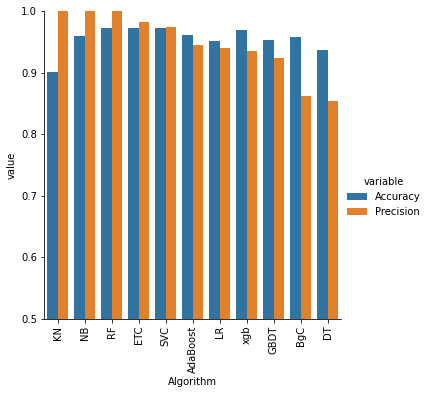

In [191]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [192]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [193]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [195]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [196]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [197]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [349]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
7,xgb,0.970019,0.934959,0.970019,0.934959,0.970019,0.934959,0.970019,0.934959
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [198]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [199]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [200]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [201]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [202]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [203]:
from sklearn.ensemble import StackingClassifier

In [204]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [207]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [214]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("AccuracyScore======",accuracy_score(Y_test,Y_pred2))
print("precisionScore======",precision_score(Y_test,Y_pred2))
print("confusion_matrix======",confusion_matrix(Y_test,Y_pred2))

AccuracyScore====== 0.9593810444874274
precisionScore====== 1.0
confusion_matrix====== [[896   0]
 [ 42  96]]


In [218]:
# creating model building
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))